## Análisis de datos - Clase 4

### Tratamiento de datos faltantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

### Identificamos datos faltantes

In [2]:
# Cargamos el dataset de Titanic de Seaborn
titanic = sns.load_dataset("titanic")

# split 80%/20% (sin target definido)
df, test_df = train_test_split(titanic, test_size=0.2, random_state=42)

print(df.shape, test_df.shape)

(712, 15) (179, 15)


In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
733,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
382,0,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
704,0,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False
813,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
536,0,1,male,45.0,0,0,26.5500,S,First,man,True,B,Southampton,no,True
361,0,2,male,29.0,1,0,27.7208,C,Second,man,True,NaN,Cherbourg,no,False
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()[df.isna().sum() > 0] # columnas con datos faltantes

age            140
embarked         2
deck           554
embark_town      2
dtype: int64

### Tratamiento de datos faltantes

1. Eliminación de datos faltantes
2. Imputación - Métodos univariados

     a) Imputación con una constante
     
     b) Imputación con valores estadísticos
     
     c) Imputación con el valor anterior o posterior (Forward/Backward Fill)


#### 1. Eliminación de datos faltantes

Si no hay demasiados valores faltantes o no se los puede imputar de manera confiable

In [6]:
df.dropna()  # Elimina filas con valores faltantes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
536,0,1,male,45.0,0,0,26.5500,S,First,man,True,B,Southampton,no,True
486,1,1,female,35.0,1,0,90.0000,S,First,woman,False,C,Southampton,yes,False
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
700,1,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


In [7]:
df.dropna(axis=1)  # Elimina columnas con valores faltantes

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
331,0,1,male,0,0,28.5000,First,man,True,no,True
733,0,2,male,0,0,13.0000,Second,man,True,no,True
382,0,3,male,0,0,7.9250,Third,man,True,no,True
704,0,3,male,1,0,7.8542,Third,man,True,no,False
813,0,3,female,4,2,31.2750,Third,child,False,no,False
...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,female,0,0,7.6500,Third,woman,False,yes,True
270,0,1,male,0,0,31.0000,First,man,True,no,True
860,0,3,male,2,0,14.1083,Third,man,True,no,False
435,1,1,female,1,2,120.0000,First,child,False,yes,False


In [8]:
n = df.shape[0]
umbral = n * .9 # tolerancia de nulos. si la columna tiene menos, la conservo.
umbral

640.8000000000001

In [9]:
df.dropna(axis=1, thresh=umbral)  # Mantiene columnas con al menos ~640 valores no nulos

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
331,0,1,male,0,0,28.5000,S,First,man,True,Southampton,no,True
733,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
382,0,3,male,0,0,7.9250,S,Third,man,True,Southampton,no,True
704,0,3,male,1,0,7.8542,S,Third,man,True,Southampton,no,False
813,0,3,female,4,2,31.2750,S,Third,child,False,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,female,0,0,7.6500,S,Third,woman,False,Southampton,yes,True
270,0,1,male,0,0,31.0000,S,First,man,True,Southampton,no,True
860,0,3,male,2,0,14.1083,S,Third,man,True,Southampton,no,False
435,1,1,female,1,2,120.0000,S,First,child,False,Southampton,yes,False


#### 2. Imputación - Métodos univariados

#### 2.a) Imputación con una constante

In [20]:
df['age_2'] = df['age']
#df['age_2'].fillna(40, inplace=True)  # Rellena con 40 (vieja forma con Warnings de Pandas)
df.fillna({'age_2':40}, inplace=True)  # Rellena con 40 (forma nueva para versiones nuevas de Pandas)
df[['age', 'age_2']]

,age,age_2
331,45.5,45.5
733,23.0,23.0
382,32.0,32.0
704,26.0,26.0
813,6.0,6.0
...,...,...
106,21.0,21.0
270,NaN,40.0
860,41.0,41.0
435,14.0,14.0


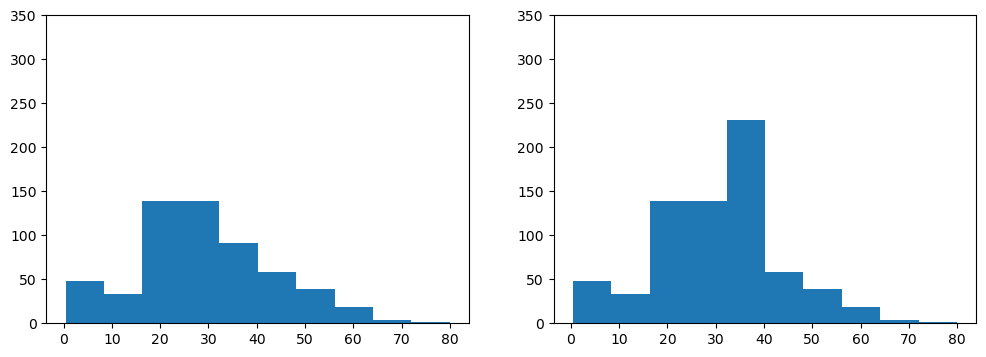

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(df['age'])
ax[1].hist(df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

#### 2.b) Imputación con valores estadísticos

Útil cuando los datos están MCAR o MAR y la distribución es bastante simétrica.

In [21]:
df['age_2'] = df['age']

df.fillna({'age_2':df['age'].median()}, inplace=True)
#df.fillna({'age_2':df['age'].mean()}, inplace=True)
#df.fillna({'age_2':df['age'].mode()}, inplace=True)

df[['age', 'age_2']]

,age,age_2
331,45.5,45.5
733,23.0,23.0
382,32.0,32.0
704,26.0,26.0
813,6.0,6.0
...,...,...
106,21.0,21.0
270,NaN,28.0
860,41.0,41.0
435,14.0,14.0


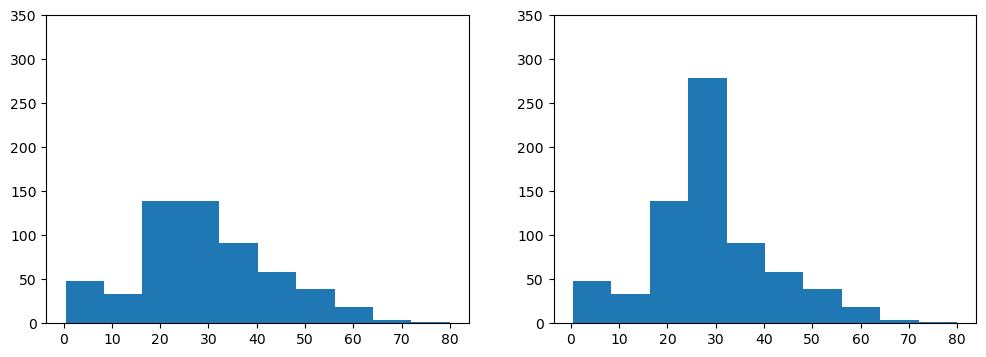

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(df['age'])
ax[1].hist(df['age_2'])
ax[0].set_ylim(0, 350)
ax[1].set_ylim(0, 350)
plt.show()

In [14]:
df[['age','age_2']].describe()

,age,age_2
count,572.000000,712.000000
mean,29.498846,29.204129
std,14.500059,13.007971
min,0.420000,0.420000
25%,21.000000,22.000000
50%,28.000000,28.000000
75%,38.000000,35.000000
max,80.000000,80.000000


#### 2.c) Imputación con el valor anterior o posterior (Forward/Backward Fill)

Útil para datos de *series temporales* con valores consecutivos relacionados.

In [22]:
# Cargamos el dataset de vuelos (Flights)

flights_df = sns.load_dataset("flights")
flights_df["month_num"] = flights_df["month"].map({
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}).astype(int)

flights_df["date"] = pd.to_datetime(flights_df["year"].astype(str) + '-' + flights_df["month_num"].astype(str), format='%Y-%m')
flights_df = flights_df.sort_values('date') # ya está ordenado, pero por las dudas ...

# Definimos un corte temporal y hacemos el split
flights_train = flights_df[flights_df['date'] < '1958-01-01'].copy()
flights_test = flights_df[flights_df['date'] >= '1958-01-01'].copy()

print(flights_train.shape, flights_test.shape)

(108, 5) (36, 5)


In [24]:
flights_train.head()

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01


In [25]:
# simulo datos faltantes en 'flights' solo a los efectos de hacer el ejercicio

flights_train['passengers_original'] = flights_train['passengers'] # hago una copia (backup) de la columna original (para comparar)

np.random.seed(42)
missing_percentage = 0.25  # 25% de los valores faltantes
n_missing = int(len(flights_train) * missing_percentage)
missing_indices = np.random.choice(flights_train.index, size=n_missing, replace=False)
flights_train.loc[missing_indices, 'passengers'] = np.nan
flights_train

,year,month,passengers,month_num,date,passengers_original
0,1949,Jan,NaN,1,1949-01-01,112
1,1949,Feb,118.0,2,1949-02-01,118
2,1949,Mar,132.0,3,1949-03-01,132
3,1949,Apr,129.0,4,1949-04-01,129
4,1949,May,NaN,5,1949-05-01,121
...,...,...,...,...,...,...
103,1957,Aug,467.0,8,1957-08-01,467
104,1957,Sep,404.0,9,1957-09-01,404
105,1957,Oct,347.0,10,1957-10-01,347
106,1957,Nov,NaN,11,1957-11-01,305


In [27]:
flights_train.isna().sum()

year                    0
month                   0
passengers             27
month_num               0
date                    0
passengers_original     0
dtype: int64

In [29]:
flights_train['passengers_2'] = flights_train['passengers']
flights_train['passengers_3'] = flights_train['passengers']

flights_train['passengers_2'] = flights_train['passengers_2'].ffill() # valor anterior
flights_train['passengers_3'] = flights_train['passengers_3'].bfill() # valor posterior

flights_train[['date', 'passengers', 'passengers_2', 'passengers_3']].head(20)

,date,passengers,passengers_2,passengers_3
0,1949-01-01,NaN,NaN,118.0
1,1949-02-01,118.0,118.0,118.0
2,1949-03-01,132.0,132.0,132.0
3,1949-04-01,129.0,129.0,129.0
4,1949-05-01,NaN,129.0,135.0
5,1949-06-01,135.0,135.0,135.0
6,1949-07-01,148.0,148.0,148.0
7,1949-08-01,148.0,148.0,148.0
8,1949-09-01,136.0,136.0,136.0
9,1949-10-01,119.0,119.0,119.0


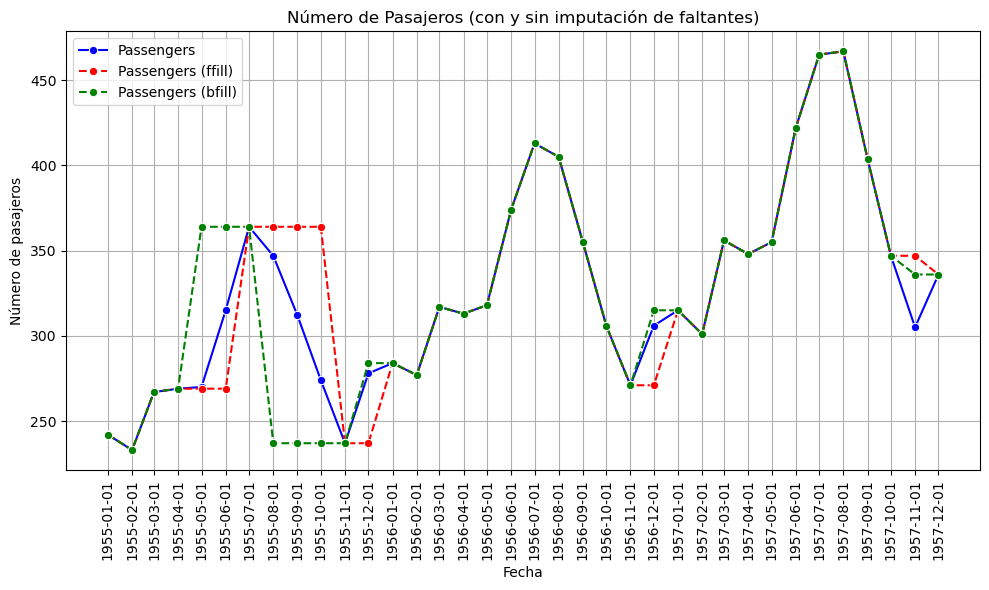

In [32]:
plt.figure(figsize=(10, 6))

data = flights_train[flights_train['year']>1954]

sns.lineplot(data=data, x='date', y='passengers_original', errorbar=None, label='Passengers', color='blue', marker='o')
sns.lineplot(data=data, x='date', y='passengers_2', errorbar=None, label='Passengers (ffill)', color='red', linestyle='--', marker='o')
sns.lineplot(data=data, x='date', y='passengers_3', errorbar=None, label='Passengers (bfill)', color='green', linestyle='--', marker='o')

# Agregar etiquetas y título
plt.title('Número de Pasajeros (con y sin imputación de faltantes)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.xticks(ticks=data['date'], rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
